<a href="https://colab.research.google.com/github/rvjh/ANN_Prac/blob/main/A_simple_classifier_using_Keras's_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [4]:
Checklist = ['CPU','GPU']

for devices in Checklist:
  out_ = tf.config.list_physical_devices(devices)
  if len(out_)>0:
    print(f"{devices} available")
    print(f"{out_}")

CPU available
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

Working on mnist dataset -
This dataset contains handwritten digits.
It has 10 classes i.e. 0 to 9
Each data point is 2D array of 28x28 size.
Also known as hello world dataset for ANN

In [16]:
## loading the dataset

mnist = tf.keras.datasets.mnist

(X_train_full , y_train_full), (X_test, y_test) = mnist.load_data()

In [17]:
print(f"shape of X_train_full : {X_train_full.shape}")
print(f"shape of y_train_full : {y_train_full.shape}")
print(f"shape of X_test : {X_test.shape}")
print(f"shape of y_test : {y_test.shape}")

shape of X_train_full : (60000, 28, 28)
shape of y_train_full : (60000,)
shape of X_test : (10000, 28, 28)
shape of y_test : (10000,)


In [18]:
## creating validation data
## scaling down the values
X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0

## never convert the lebel 
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

##scaling down the test set also

X_test = X_test/255.0

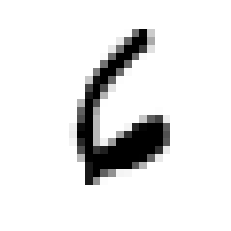

In [19]:
plt.imshow(X_train[3],cmap='binary')
plt.axis('off')
plt.show()

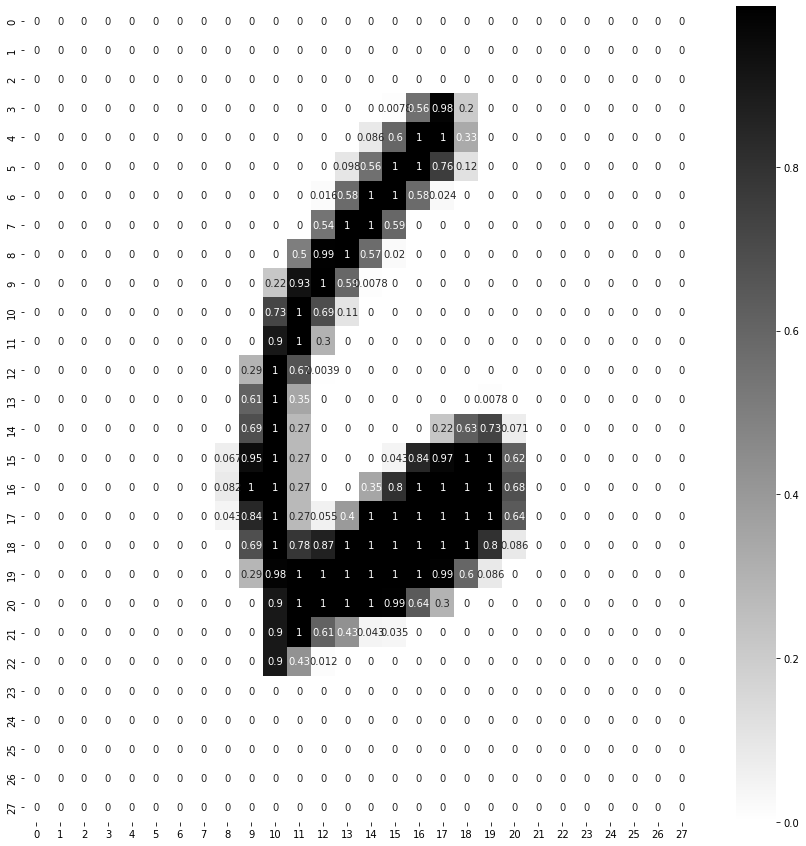

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[3],cmap='binary',annot=True)
plt.show()

In [21]:
# actual value of y_train
y_train[3]

6

In [31]:
set(y_train.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [33]:
## creating a Sequential pipeline

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28,28]))
model.add(tf.keras.layers.Dense(units=300, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [34]:
model.layers

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMISERS = 'adam'
METRICES = ['accuracy']


model.compile(optimizer=OPTIMISERS, loss=LOSS_FUNCTION, metrics=METRICES)

In [39]:
VALIDATION_SET = (X_valid, y_valid)
EPOCHS = 20


history = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 2.3219 - accuracy: 0.1075 - val_loss: 2.3026 - val_accuracy: 0.0958
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0958
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0958
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0958
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0958
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0958
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy:

In [41]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.321853,0.107473,2.302583,0.0958
1,2.302550,0.098982,2.302583,0.0958
2,2.302550,0.098982,2.302583,0.0958
3,2.302550,0.098982,2.302583,0.0958
4,2.302550,0.098982,2.302583,0.0958
5,2.302550,0.098982,2.302583,0.0958
6,2.302550,0.098982,2.302583,0.0958
7,2.302550,0.098982,2.302583,0.0958
8,2.302550,0.098982,2.302583,0.0958
9,2.302550,0.098982,2.302583,0.0958


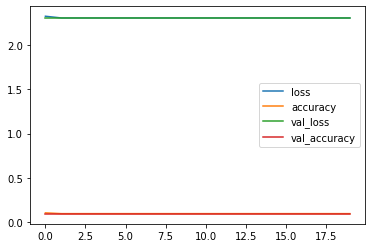

In [42]:
pd.DataFrame(history.history).plot()

In [43]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [45]:
UNIQUE_PATH = model.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_10_26_05_53_32_.h5


In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0980


[2.30259108543396, 0.09799999743700027]

In [50]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([0, 0, 0])

In [53]:
y_test_new = y_test[:3]

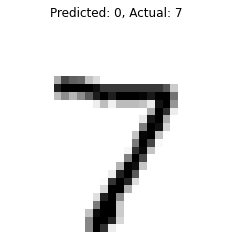

------------------------------------------------------------


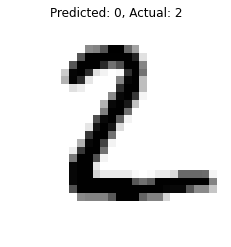

------------------------------------------------------------


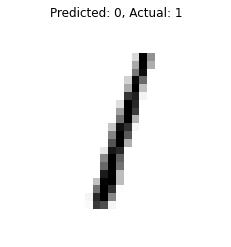

------------------------------------------------------------


In [54]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)